## 1. Classification with Wine Dataset

In this section we explore classification techniques using the Wine dataset.

In [40]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine(as_frame=True)
df_wine = pd.concat([wine.data, wine.target.rename("target")], axis=1)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [41]:
df_wine['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [42]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [43]:
from sklearn.model_selection import train_test_split

X = df_wine.drop("target", axis=1)
y = df_wine["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42).fit(X_train, y_train)
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42).fit(X_train, y_train)

print("Gini Accuracy:", accuracy_score(y_test, clf_gini.predict(X_test)))
print("Entropy Accuracy:", accuracy_score(y_test, clf_entropy.predict(X_test)))

Gini Accuracy: 0.9444444444444444
Entropy Accuracy: 0.9722222222222222


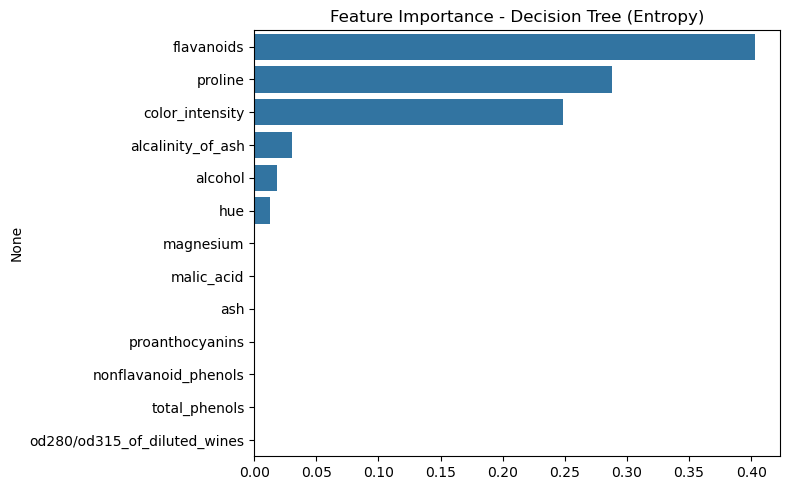

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(clf_entropy.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance - Decision Tree (Entropy)")
plt.tight_layout()
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

knn = KNeighborsClassifier().fit(X_train, y_train)
svm = SVC(kernel='linear', probability=True).fit(X_train, y_train)

print("KNN Performance:")
print(classification_report(y_test, knn.predict(X_test)))
print("SVM Performance:")
print(classification_report(y_test, svm.predict(X_test)))

KNN Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.77      0.71      0.74        14
           2       0.64      0.70      0.67        10

    accuracy                           0.81        36
   macro avg       0.80      0.80      0.80        36
weighted avg       0.81      0.81      0.81        36

SVM Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



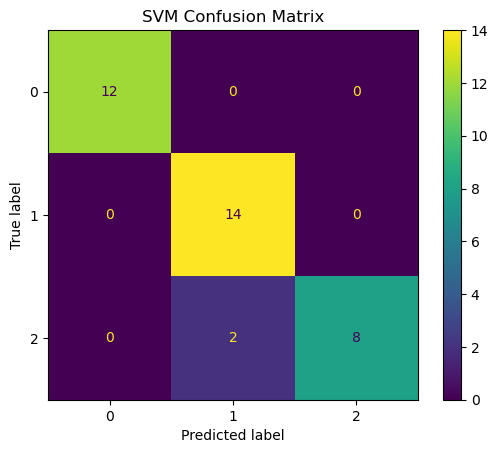

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf'))])
pipe.fit(X_train, y_train)
print("Pipeline performance:")
print(classification_report(y_test, pipe.predict(X_test)))

Pipeline performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## 2. Anomaly Detection with Mammographic Mass Dataset

Explore anomaly detection methods on medical data.

In [49]:
from ucimlrepo import fetch_ucirepo

ds = fetch_ucirepo(id=161) 
df = ds.data.original.copy()
df.columns = [c.strip() for c in df.columns]
df.dropna(inplace=True)
df['is_anomaly'] = df['Severity'].astype(int)
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity,is_anomaly
0,5.0,67.0,3.0,5.0,3.0,1,1
2,5.0,58.0,4.0,5.0,3.0,1,1
3,4.0,28.0,1.0,1.0,3.0,0,0
8,5.0,57.0,1.0,5.0,3.0,1,1
10,5.0,76.0,1.0,4.0,3.0,1,1


In [50]:
import pandas as pd
import numpy as np

malignat_idx = (df['is_anomaly']==1)

# Example: a Series with ~50% True
np.random.seed(42)

# Target: keep only ~4% of True values
true_indices = malignat_idx[malignat_idx].index
n_keep = int(len(malignat_idx) * 0.04)  # target 4% of total
keep_indices = np.random.choice(true_indices, size=n_keep, replace=False)

# Set all True to False, then restore only the kept ones
malignat_reduced = pd.Series(False, index=malignat_idx.index)
malignat_reduced.loc[keep_indices] = True

resampled_idx = malignat_reduced | (df['is_anomaly']==0)
df = df[resampled_idx]

In [51]:
from scipy.stats import zscore

zs = df[['Age', 'Shape']].apply(zscore)
df['z_outlier'] = (zs.abs() > 3).any(axis=1)
df['z_outlier'].value_counts()

z_outlier
False    460
Name: count, dtype: int64

In [52]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.03, random_state=42)
df['iso_pred'] = iso.fit_predict(df[['Age', 'Shape', 'Margin', 'Density']])
df['iso_pred'] = df['iso_pred'].map({1: 0, -1: 1})
df['iso_pred'].value_counts()

iso_pred
0    446
1     14
Name: count, dtype: int64

In [53]:
df[df['iso_pred'] ==1]

,BI-RADS,Age,Shape,Margin,Density,Severity,is_anomaly,z_outlier,iso_pred
30,4.0,46.0,1.0,5.0,2.0,0,0,False,1
41,4.0,78.0,1.0,1.0,1.0,0,0,False,1
44,5.0,62.0,3.0,5.0,2.0,1,1,False,1
56,4.0,49.0,2.0,1.0,1.0,0,0,False,1
79,5.0,67.0,2.0,4.0,1.0,0,0,False,1
169,5.0,86.0,4.0,5.0,3.0,1,1,False,1
198,4.0,73.0,3.0,1.0,2.0,0,0,False,1
210,4.0,46.0,1.0,1.0,1.0,0,0,False,1
273,2.0,76.0,1.0,1.0,2.0,0,0,False,1
324,4.0,79.0,1.0,1.0,2.0,0,0,False,1


In [54]:
from sklearn.svm import OneClassSVM

ocsvm = OneClassSVM(nu=0.03, kernel='rbf', gamma='scale')
preds = ocsvm.fit_predict(df[['Age', 'Shape', 'Margin', 'Density']])
df['ocsvm_pred'] = (preds == -1).astype(int)
df['ocsvm_pred'].value_counts()

ocsvm_pred
0    447
1     13
Name: count, dtype: int64

In [55]:
df[df['ocsvm_pred'] ==1]

,BI-RADS,Age,Shape,Margin,Density,Severity,is_anomaly,z_outlier,iso_pred,ocsvm_pred
34,4.0,81.0,1.0,1.0,3.0,0,0,False,0,1
119,5.0,84.0,4.0,5.0,3.0,0,0,False,0,1
132,5.0,86.0,4.0,4.0,3.0,0,0,False,0,1
169,5.0,86.0,4.0,5.0,3.0,1,1,False,1,1
182,4.0,19.0,1.0,1.0,3.0,0,0,False,0,1
324,4.0,79.0,1.0,1.0,2.0,0,0,False,1,1
354,5.0,83.0,4.0,4.0,3.0,1,1,False,0,1
463,4.0,18.0,1.0,1.0,3.0,0,0,False,0,1
693,4.0,79.0,4.0,4.0,3.0,1,1,False,0,1
711,4.0,19.0,1.0,1.0,3.0,0,0,False,0,1


In [72]:
import numpy as np

ocsvm_f = OneClassSVM(nu=0.03, kernel='rbf', gamma='scale')
df['ocsvm_feat_pred'] = df['Age']*df['Density'] #new feature

preds = ocsvm_f.fit_predict(df[['Age', 'Shape', 'Margin', 'Density', 'ocsvm_feat_pred']])
df['ocsvm_f_pred'] = (preds == -1).astype(int)
df['ocsvm_f_pred'].value_counts()

ocsvm_f_pred
0    442
1     18
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Isolation Forest - Precision:", precision_score(df['is_anomaly'], df['iso_pred']))
print("One-Class SVM - Precision:", precision_score(df['is_anomaly'], df['ocsvm_pred']))
print("One-Class SVM Features- Precision:", precision_score(df['is_anomaly'], df['ocsvm_f_pred']))

Isolation Forest - Precision: 0.14285714285714285
One-Class SVM - Precision: 0.23076923076923078
One-Class SVM Features- Precision: 0.16666666666666666


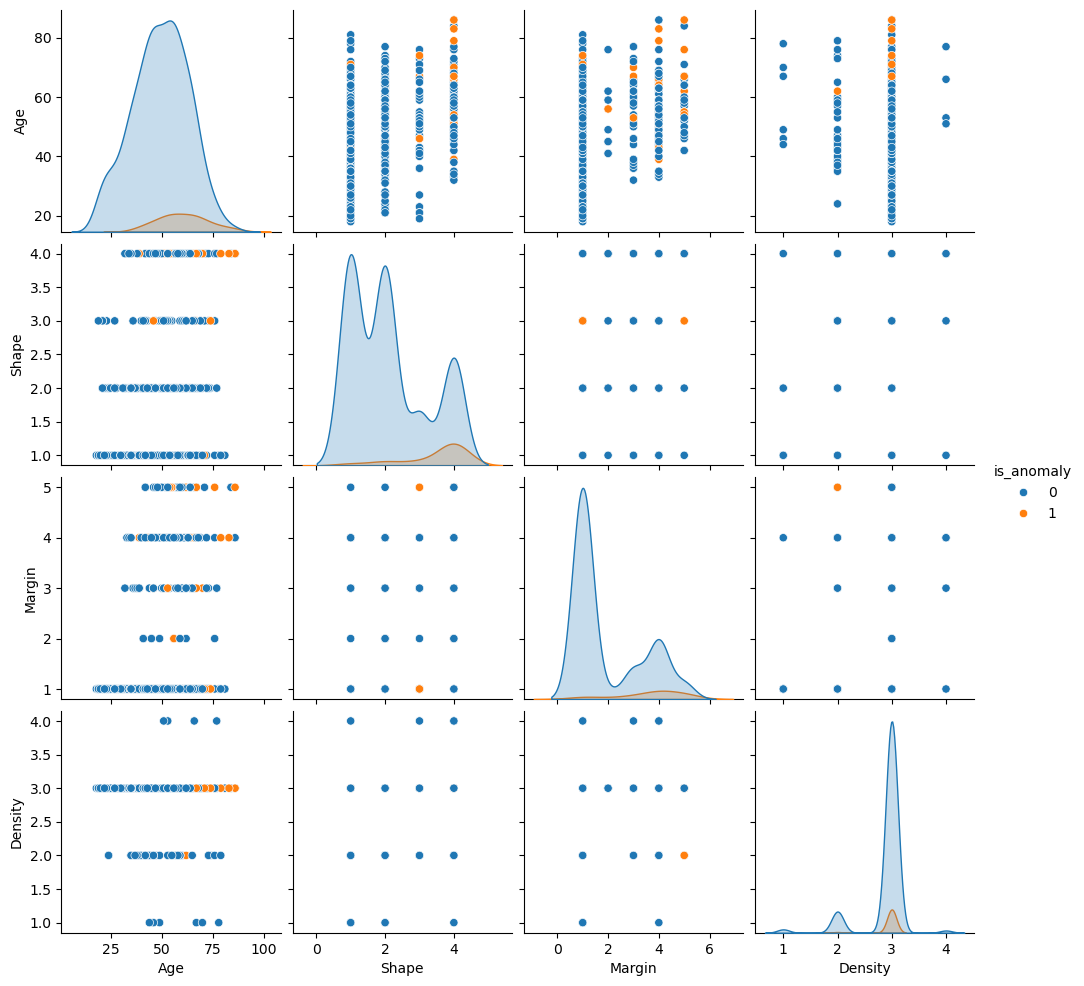

In [58]:
from seaborn import pairplot
pairplot(df[['Age', 'Shape', 'Margin', 'Density', 'is_anomaly']], hue='is_anomaly')

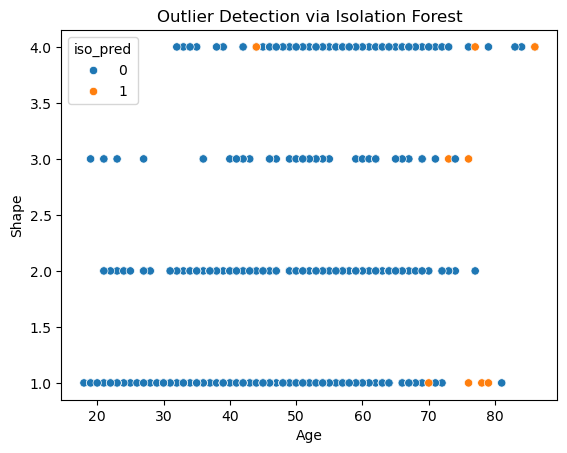

In [59]:
sns.scatterplot(data=df, x='Age', y='Shape', hue='iso_pred')
plt.title("Outlier Detection via Isolation Forest")
plt.show()

In [60]:
# Faulty line: df['z_outlier'] = (zs > 3).any(axis=1)  # incorrect
# Fix:
df['z_outlier'] = (zs.abs() > 3).any(axis=1)
df['z_outlier'].value_counts()

z_outlier
False    460
Name: count, dtype: int64

In [61]:
zs.abs().max(axis=1).nlargest(13)

132    2.592387
169    2.592387
119    2.447973
354    2.375766
463    2.317687
182    2.245480
711    2.245480
847    2.245480
869    2.245480
34     2.231352
927    2.173273
170    2.101066
505    2.101066
dtype: float64

In [62]:
df['z_contaminadted'] = zs.abs().max(axis=1) > 2.101
df['z_contaminadted'] .value_counts()
print("Z-score - Precision:", precision_score(df['is_anomaly'], df['z_contaminadted']))

Z-score - Precision: 0.11764705882352941
